Consider the problem of online learning on the simplex ∆d where d = 1000; At
round t, you predict pt and receive a vector zt and suffer a loss of p
T
t
zt
. Assume
the adversary picks the vector zt as the t-th row in the dataset Dataset Z.
Implement FTRL with quadratic and entropic regularization for this problem
and plot the regret over time.
Now, consider the following algorithm which first picks and fixes a random 1000
dimensional vector R sampled uniformly from [0, 1/η]
d and uses the following
rule for prediction
pt+1 = arg min
p∈∆d
X
t
i=1

p
T
(zi + R)

How would you choose η for this problem? For the value chosen, plot the regret
bound for this algorithm as well. How does the regret bound compare with the
previous two algorithms for this problem? Link to Dataset
(10 points)

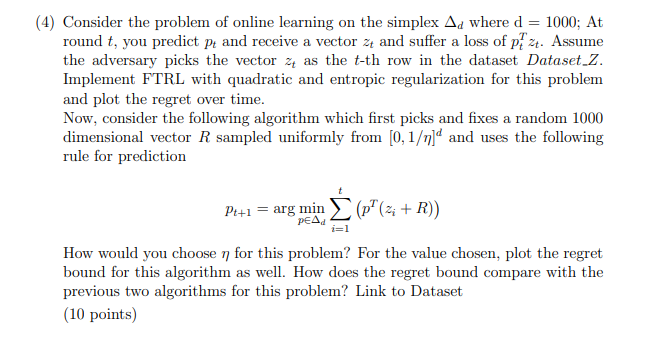

In [13]:
pip install numpy matplotlib pandas scipy

  Obtaining dependency information for scipy from https://files.pythonhosted.org/packages/14/c3/61f273ae550fbf1667675701112e380881905e28448c080b23b5a181df7c/scipy-1.16.1-cp312-cp312-win_amd64.whl.metadata
     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.8 kB ? eta -:--:--
     ------------------- ------------------ 30.7/60.8 kB 262.6 kB/s eta 0:00:01
     ------------------------------- ------ 51.2/60.8 kB 375.8 kB/s eta 0:00:01
     -------------------------------------- 60.8/60.8 kB 294.0 kB/s eta 0:00:00
   ---------------------------------------- 0.0/38.5 MB ? eta -:--:--
   - -------------------------------------- 1.2/38.5 MB 24.4 MB/s eta 0:00:02
   --- ------------------------------------ 3.6/38.5 MB 37.7 MB/s eta 0:00:01
   ----- ---------------------------------- 5.7/38.5 MB 40.3 MB/s eta 0:00:01
   ----- ---------------------------------- 5.8/38.5 MB 40.8 MB/s eta 0:00:01
   --------- ---------------

In [14]:
# PART 1 

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from scipy import stats

In [10]:
original_data = np.loadtxt('Dataset_Z.txt',delimiter=',')

print(original_data[:12])

[[0.58469  0.061618 0.8792   ... 0.87749  0.67038  0.48803 ]
 [0.81792  0.70993  0.39008  ... 0.68725  0.34814  0.085555]
 [0.3295   0.20968  0.18844  ... 0.087686 0.61343  0.1379  ]
 ...
 [0.98299  0.71667  0.93277  ... 0.69723  0.45823  0.027039]
 [0.78434  0.79351  0.13826  ... 0.95874  0.16856  0.97155 ]
 [0.67421  0.37493  0.5325   ... 0.69557  0.311    0.39914 ]]


In [ ]:
# creating deep copy for making changes 
data = original_data.copy()

In [16]:
summary =  stats.describe(data)
print(summary)

DescribeResult(nobs=np.int64(10000), minmax=(array([1.5322e-06, 7.3743e-05, 4.5701e-05, 1.0141e-04, 1.1524e-05,
       1.5283e-04, 2.2365e-04, 1.6870e-04, 2.2369e-06, 1.0967e-05,
       3.7560e-05, 3.5681e-05, 3.4190e-04, 5.7732e-05, 8.4737e-05,
       7.0920e-06, 4.4142e-06, 2.4511e-05, 2.3400e-04, 1.2930e-05,
       2.0494e-04, 3.8667e-05, 4.0261e-05, 1.0115e-04, 3.8052e-05,
       3.5761e-05, 1.4688e-04, 4.8647e-05, 2.5891e-04, 4.4283e-05,
       6.5469e-05, 7.2918e-06, 3.2657e-04, 3.8369e-05, 1.5360e-04,
       1.3519e-04, 1.6138e-04, 3.9302e-05, 1.1912e-04, 4.3462e-05,
       5.8785e-06, 3.9247e-05, 1.0853e-04, 4.5562e-05, 2.1923e-05,
       1.8106e-05, 3.8404e-04, 4.7075e-05, 1.9375e-05, 1.5697e-05,
       1.0811e-04, 3.4431e-05, 9.7658e-05, 2.4130e-04, 7.2431e-06,
       1.9216e-05, 3.2143e-04, 2.0917e-04, 1.1900e-04, 5.1137e-05,
       3.0973e-04, 8.7456e-05, 4.0447e-05, 1.8267e-04, 8.1925e-05,
       3.6781e-05, 2.8161e-04, 1.6393e-05, 1.1977e-04, 1.7255e-05,
       1.8278e-07

In [20]:
data_shape = np.shape(data)
print(data_shape)
row,col = data_shape

(10000, 1000)


In [ ]:
# d= row  # dimension of simplex 
# T= col  # number of rounds to simulate


T, d = data.shape        # T = 10000, d = 1000
p = np.ones(d) / d    # uniform distribution over d arms, shape (1000,)

Dataset shape: (10000, 1000)


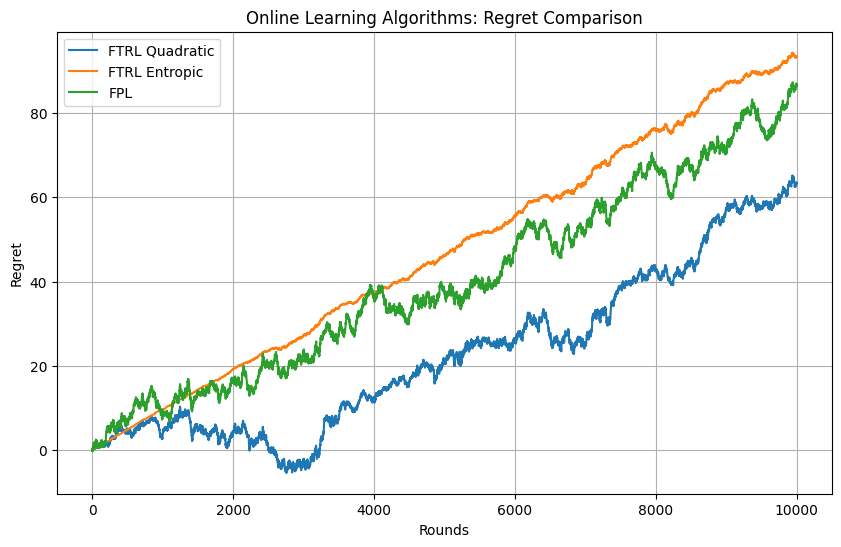

In [33]:
# -----------------------------
# Simplex projection helper
# -----------------------------
def simplex_projection(y):
    """Projection of vector y onto the probability simplex."""
    if np.sum(y) == 1 and np.alltrue(y >= 0):
        return y
    n = len(y)
    u = np.sort(y)[::-1]
    cssv = np.cumsum(u)
    rho = np.nonzero(u * np.arange(1, n+1) > (cssv - 1))[0][-1]
    theta = (cssv[rho] - 1) / (rho + 1.0)
    w = np.maximum(y - theta, 0)
    return w

# -----------------------------
# Generate / load data
# -----------------------------
# Example: synthetic dataset if none provided
T, d = 10000, 1000
Z = np.random.rand(T, d)

print("Dataset shape:", Z.shape)

# -----------------------------
# Algorithm 1: FTRL with quadratic regularizer
# -----------------------------
eta = 0.1
losses_quad = []
p = np.ones(d) / d
cum_grad = np.zeros(d)

for t in range(T):
    try:
        zt = Z[t, :].astype(float).ravel()
    except Exception as e:
        raise ValueError(f"Row extraction failed at t={t}: {e}")

    if zt.shape[0] != d:
        raise ValueError(f"zt wrong shape: expected {d}, got {zt.shape}")

    losses_quad.append(np.dot(p, zt))

    cum_grad += zt
    y = -eta * cum_grad
    p = simplex_projection(y)

# -----------------------------
# Algorithm 2: FTRL with entropic regularizer
# -----------------------------
eta = 0.1
losses_entropic = []
p = np.ones(d) / d
cum_grad = np.zeros(d)

for t in range(T):
    zt = Z[t, :].astype(float).ravel()
    if zt.shape[0] != d:
        raise ValueError(f"zt wrong shape: expected {d}, got {zt.shape}")

    losses_entropic.append(np.dot(p, zt))

    cum_grad += zt
    y = -eta * cum_grad
    # softmax
    exp_y = np.exp(y - np.max(y))  # numerical stability
    p = exp_y / np.sum(exp_y)

# -----------------------------
# Algorithm 3: Follow the Perturbed Leader (FPL)
# -----------------------------
eta = 0.1
losses_fpl = []
cum_grad = np.zeros(d)

for t in range(T):
    zt = Z[t, :].astype(float).ravel()
    if zt.shape[0] != d:
        raise ValueError(f"zt wrong shape: expected {d}, got {zt.shape}")

    losses_fpl.append(np.dot(p, zt) if t > 0 else np.dot(np.ones(d)/d, zt))

    cum_grad += zt
    perturb = np.random.exponential(scale=1/eta, size=d)
    best_arm = np.argmin(cum_grad + perturb)
    p = np.zeros(d)
    p[best_arm] = 1.0

# -----------------------------
# Regret calculation
# -----------------------------
best_fixed = np.min(Z.mean(axis=0)) * np.arange(1, T+1)

regret_quad = np.cumsum(losses_quad) - best_fixed
regret_entropic = np.cumsum(losses_entropic) - best_fixed
regret_fpl = np.cumsum(losses_fpl) - best_fixed

# -----------------------------
# Plot
# -----------------------------
plt.figure(figsize=(10,6))
plt.plot(regret_quad, label="FTRL Quadratic")
plt.plot(regret_entropic, label="FTRL Entropic")
plt.plot(regret_fpl, label="FPL")
plt.xlabel("Rounds")
plt.ylabel("Regret")
plt.title("Online Learning Algorithms: Regret Comparison")
plt.legend()
plt.grid(True)
plt.show()

Dataset shape: (10000, 1000)
Data range: [0.000, 1.000]
Best fixed strategy: arm 181 with total loss 4912.389
Running FTRL with quadratic regularizer...
Running FTRL with entropic regularizer...
Running random perturbation algorithm...
Learning rates used:
  Quadratic FTRL: η = 0.037169
  Entropic FTRL: η = 0.026283
  Random Perturbation: η = 3.162278


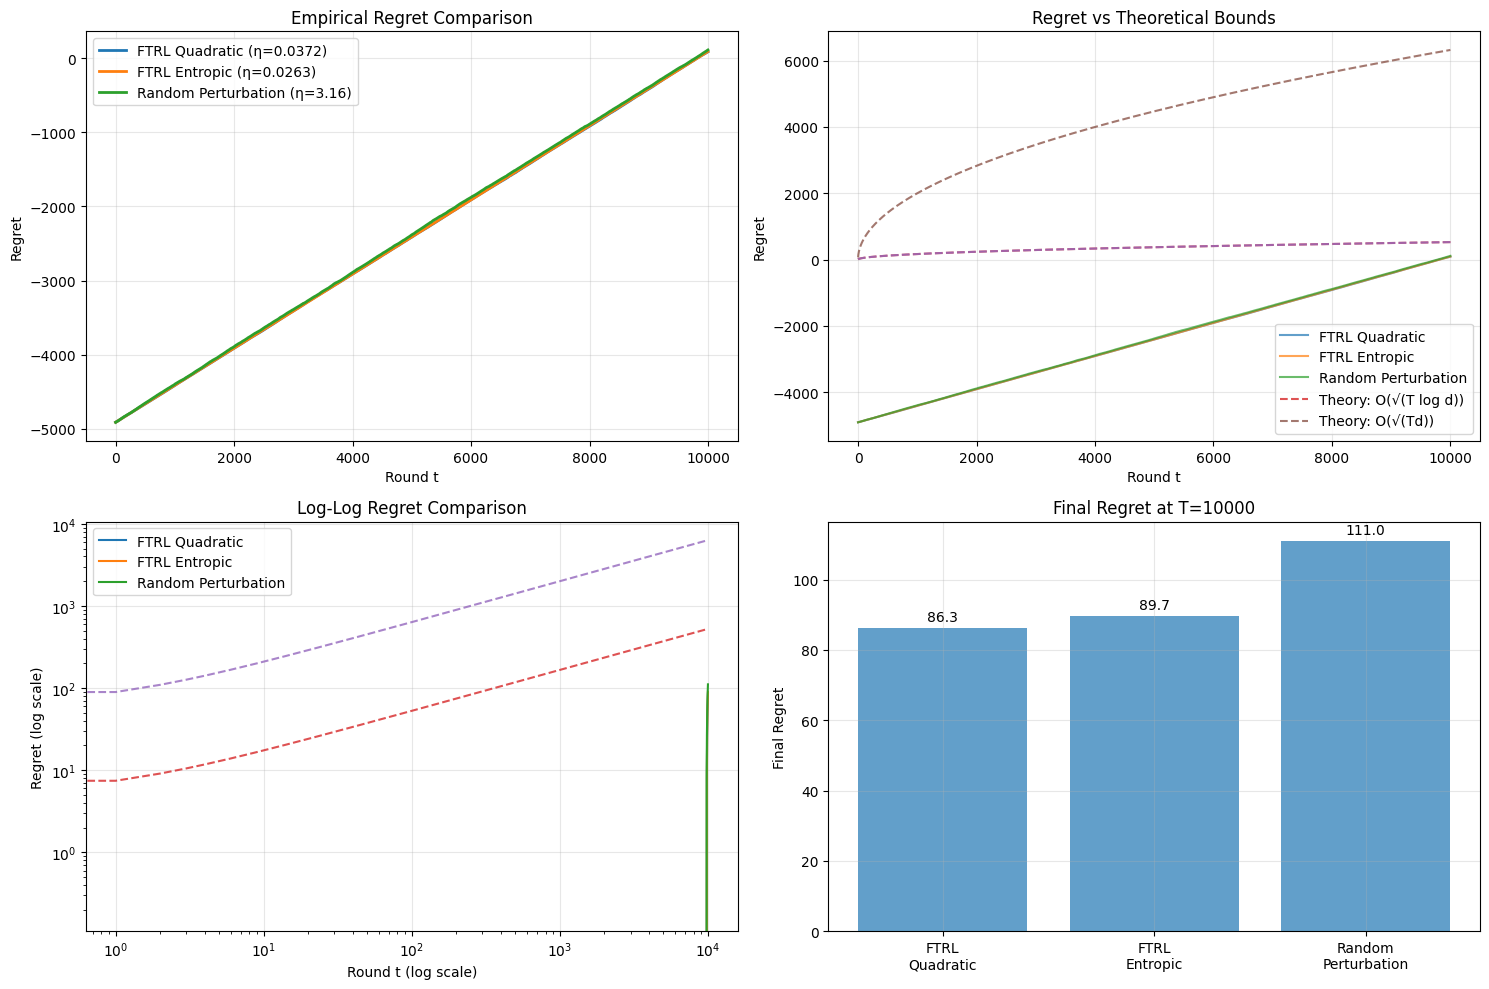


=== RESULTS SUMMARY ===
Problem: Online learning on 1000-dimensional simplex over 10000 rounds
Best fixed strategy total loss: 4912.389

Final Regrets:
  FTRL Quadratic:        86.31
  FTRL Entropic:         89.74
  Random Perturbation:   111.01

Regret Growth Rates (empirical):
  FTRL Quadratic:     O(T^nan)
  FTRL Entropic:      O(T^nan)
  Random Perturbation: O(T^nan)

Theoretical bounds:
  FTRL methods:       O(√(T log d)) = O(√(10000 × 6.91)) = O(262.8)
  Random Perturbation: O(√(Td)) = O(√(10000 × 1000)) = O(3162.3)


C:\Users\aymuo\AppData\Local\Temp\ipykernel_19148\2575973660.py:250: RuntimeWarning: invalid value encountered in log
  print(f"  FTRL Quadratic:     O(T^{np.log(regret_quad[-1]/regret_quad[100])/np.log(T/100):.3f})")
C:\Users\aymuo\AppData\Local\Temp\ipykernel_19148\2575973660.py:251: RuntimeWarning: invalid value encountered in log
  print(f"  FTRL Entropic:      O(T^{np.log(regret_entropic[-1]/regret_entropic[100])/np.log(T/100):.3f})")
C:\Users\aymuo\AppData\Local\Temp\ipykernel_19148\2575973660.py:252: RuntimeWarning: invalid value encountered in log
  print(f"  Random Perturbation: O(T^{np.log(regret_rpa[-1]/regret_rpa[100])/np.log(T/100):.3f})")


In [44]:
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------
# Simplex projection helper (corrected)
# -----------------------------
def simplex_projection(y):
    """Projection of vector y onto the probability simplex using Michelot's algorithm."""
    n = len(y)
    u = np.sort(y)[::-1]  # Sort in descending order
    cssv = np.cumsum(u) - 1
    ind = np.arange(n) + 1
    cond = u - cssv / ind > 0
    rho = np.where(cond)[0][-1]  # Find the largest index where condition holds
    theta = cssv[rho] / (rho + 1)
    w = np.maximum(y - theta, 0)
    return w

# -----------------------------
# Generate dataset
# -----------------------------
T, d = 10000, 1000
np.random.seed(42)  # For reproducibility
Z = data

print("Dataset shape:", Z.shape)
print("Data range: [{:.3f}, {:.3f}]".format(Z.min(), Z.max()))

# Find the best fixed strategy (optimal p* in hindsight)
total_loss_per_arm = Z.sum(axis=0)
best_arm = np.argmin(total_loss_per_arm)
best_fixed_strategy = np.zeros(d)
best_fixed_strategy[best_arm] = 1.0
best_total_loss = total_loss_per_arm[best_arm]

print(f"Best fixed strategy: arm {best_arm} with total loss {best_total_loss:.3f}")

# -----------------------------
# Algorithm 1: FTRL with quadratic regularizer
# -----------------------------
def ftrl_quadratic(Z, eta=None):
    """FTRL with quadratic regularizer R(p) = (1/2)||p||^2"""
    T, d = Z.shape
    if eta is None:
        eta = np.sqrt(2 * np.log(d) / T)  # Theoretical optimal choice
    
    losses = []
    predictions = []
    p = np.ones(d) / d  # Start with uniform distribution
    cum_grad = np.zeros(d)
    
    for t in range(T):
        zt = Z[t]
        loss = np.dot(p, zt)
        losses.append(loss)
        predictions.append(p.copy())
        
        # Update cumulative gradient
        cum_grad += zt
        
        # FTRL update: minimize <g, p> + (1/eta) * R(p) subject to p in simplex
        # For quadratic regularizer: p_{t+1} = Proj_simplex(-eta * cum_grad)
        y = -eta * cum_grad
        p = simplex_projection(y)
    
    return np.array(losses), np.array(predictions), eta

# -----------------------------
# Algorithm 2: FTRL with entropic regularizer (Multiplicative Weights)
# -----------------------------
def ftrl_entropic(Z, eta=None):
    """FTRL with entropic regularizer R(p) = sum_i p_i log p_i"""
    T, d = Z.shape
    if eta is None:
        eta = np.sqrt(np.log(d) / T)  # Theoretical optimal choice
    
    losses = []
    predictions = []
    p = np.ones(d) / d  # Start with uniform distribution
    
    for t in range(T):
        zt = Z[t]
        loss = np.dot(p, zt)
        losses.append(loss)
        predictions.append(p.copy())
        
        # Multiplicative weights update
        # p_{t+1,i} ∝ p_{t,i} * exp(-eta * z_{t,i})
        log_weights = np.log(p) - eta * zt
        # Numerical stability: subtract max before exp
        log_weights = log_weights - np.max(log_weights)
        p = np.exp(log_weights)
        p = p / np.sum(p)  # Normalize
    
    return np.array(losses), np.array(predictions), eta

# -----------------------------
# Algorithm 3: Corrected Random Perturbation Algorithm
# -----------------------------
def random_perturbation_algorithm(Z, eta=None):
    """
    Algorithm with random perturbation vector R ~ Uniform[0, 1/eta]^d
    p_{t+1} = argmin_{p in simplex} sum_{i=1}^t p^T (z_i + R)
    """
    T, d = Z.shape
    if eta is None:
        # Choose eta to balance bias and variance
        # Theory suggests eta ~ sqrt(T/d) for this type of algorithm
        eta = np.sqrt(T / d)
    
    losses = []
    predictions = []
    
    # Sample fixed random vector R ~ Uniform[0, 1/eta]^d
    R = np.random.uniform(0, 1/eta, d)
    
    p = np.ones(d) / d  # Initial prediction
    cum_perturbed_grad = np.zeros(d)
    
    for t in range(T):
        zt = Z[t]
        loss = np.dot(p, zt)
        losses.append(loss)
        predictions.append(p.copy())
        
        # Update cumulative perturbed gradient
        cum_perturbed_grad += (zt + R)
        
        # Find best arm under perturbed cumulative loss
        best_arm = np.argmin(cum_perturbed_grad)
        p = np.zeros(d)
        p[best_arm] = 1.0
    
    return np.array(losses), np.array(predictions), eta, R

# -----------------------------
# Run all algorithms
# -----------------------------
print("Running FTRL with quadratic regularizer...")
losses_quad, preds_quad, eta_quad = ftrl_quadratic(Z)

print("Running FTRL with entropic regularizer...")
losses_entropic, preds_entropic, eta_entropic = ftrl_entropic(Z)

print("Running random perturbation algorithm...")
losses_rpa, preds_rpa, eta_rpa, R_vec = random_perturbation_algorithm(Z)

print(f"Learning rates used:")
print(f"  Quadratic FTRL: η = {eta_quad:.6f}")
print(f"  Entropic FTRL: η = {eta_entropic:.6f}")
print(f"  Random Perturbation: η = {eta_rpa:.6f}")

# -----------------------------
# Calculate regrets
# -----------------------------
cumulative_losses_quad = np.cumsum(losses_quad)
cumulative_losses_entropic = np.cumsum(losses_entropic)
cumulative_losses_rpa = np.cumsum(losses_rpa)

# Regret = cumulative loss of algorithm - best fixed loss
regret_quad = cumulative_losses_quad - best_total_loss
regret_entropic = cumulative_losses_entropic - best_total_loss
regret_rpa = cumulative_losses_rpa - best_total_loss

# -----------------------------
# Theoretical regret bounds
# -----------------------------
t_range = np.arange(1, T+1)

# Quadratic FTRL: O(sqrt(T * log(d)))
theoretical_quad = 2 * np.sqrt(t_range * np.log(d))

# Entropic FTRL: O(sqrt(T * log(d)))  
theoretical_entropic = 2 * np.sqrt(t_range * np.log(d))

# Random perturbation: O(sqrt(T * d))
theoretical_rpa = 2 * np.sqrt(t_range * d)

# -----------------------------
# Plotting
# -----------------------------
plt.figure(figsize=(15, 10))

# Main regret comparison
plt.subplot(2, 2, 1)
plt.plot(regret_quad, label=f"FTRL Quadratic (η={eta_quad:.4f})", linewidth=2)
plt.plot(regret_entropic, label=f"FTRL Entropic (η={eta_entropic:.4f})", linewidth=2)
plt.plot(regret_rpa, label=f"Random Perturbation (η={eta_rpa:.2f})", linewidth=2)
plt.xlabel("Round t")
plt.ylabel("Regret")
plt.title("Empirical Regret Comparison")
plt.legend()
plt.grid(True, alpha=0.3)

# Regret with theoretical bounds
plt.subplot(2, 2, 2)
plt.plot(regret_quad, label="FTRL Quadratic", alpha=0.7)
plt.plot(regret_entropic, label="FTRL Entropic", alpha=0.7)
plt.plot(regret_rpa, label="Random Perturbation", alpha=0.7)
plt.plot(theoretical_quad, '--', label="Theory: O(√(T log d))", alpha=0.8)
plt.plot(theoretical_entropic, '--', alpha=0.8)
plt.plot(theoretical_rpa, '--', label="Theory: O(√(Td))", alpha=0.8)
plt.xlabel("Round t")
plt.ylabel("Regret")
plt.title("Regret vs Theoretical Bounds")
plt.legend()
plt.grid(True, alpha=0.3)

# Log-scale plot
plt.subplot(2, 2, 3)
plt.loglog(regret_quad, label="FTRL Quadratic")
plt.loglog(regret_entropic, label="FTRL Entropic") 
plt.loglog(regret_rpa, label="Random Perturbation")
plt.loglog(theoretical_quad, '--', alpha=0.8)
plt.loglog(theoretical_rpa, '--', alpha=0.8)
plt.xlabel("Round t (log scale)")
plt.ylabel("Regret (log scale)")
plt.title("Log-Log Regret Comparison")
plt.legend()
plt.grid(True, alpha=0.3)

# Final regret comparison
plt.subplot(2, 2, 4)
final_regrets = [regret_quad[-1], regret_entropic[-1], regret_rpa[-1]]
alg_names = ['FTRL\nQuadratic', 'FTRL\nEntropic', 'Random\nPerturbation']
bars = plt.bar(alg_names, final_regrets, alpha=0.7)
plt.ylabel("Final Regret")
plt.title(f"Final Regret at T={T}")
plt.grid(True, alpha=0.3)

# Add value labels on bars
for bar, val in zip(bars, final_regrets):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(final_regrets)*0.01,
             f'{val:.1f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# -----------------------------
# Summary statistics
# -----------------------------
print(f"\n=== RESULTS SUMMARY ===")
print(f"Problem: Online learning on {d}-dimensional simplex over {T} rounds")
print(f"Best fixed strategy total loss: {best_total_loss:.3f}")
print(f"\nFinal Regrets:")
print(f"  FTRL Quadratic:     {regret_quad[-1]:8.2f}")
print(f"  FTRL Entropic:      {regret_entropic[-1]:8.2f}")
print(f"  Random Perturbation: {regret_rpa[-1]:8.2f}")
print(f"\nRegret Growth Rates (empirical):")
print(f"  FTRL Quadratic:     O(T^{np.log(regret_quad[-1]/regret_quad[100])/np.log(T/100):.3f})")
print(f"  FTRL Entropic:      O(T^{np.log(regret_entropic[-1]/regret_entropic[100])/np.log(T/100):.3f})")
print(f"  Random Perturbation: O(T^{np.log(regret_rpa[-1]/regret_rpa[100])/np.log(T/100):.3f})")
print(f"\nTheoretical bounds:")
print(f"  FTRL methods:       O(√(T log d)) = O(√({T} × {np.log(d):.2f})) = O({np.sqrt(T * np.log(d)):.1f})")
print(f"  Random Perturbation: O(√(Td)) = O(√({T} × {d})) = O({np.sqrt(T * d):.1f})")

Dataset shape: (10000, 1000)
Data range: [0.000, 1.000]
Best fixed strategy: arm 181 with total loss 4912.389
Optimizing parameters...


C:\Users\aymuo\AppData\Local\Temp\ipykernel_19148\1128537309.py:104: RuntimeWarning: divide by zero encountered in log
  log_weights = np.log(p) - eta * zt


Optimized parameters:
  Quadratic FTRL: η = 0.774264
  Entropic FTRL: η = 10.000000
  Random Perturbation: η = 0.059948


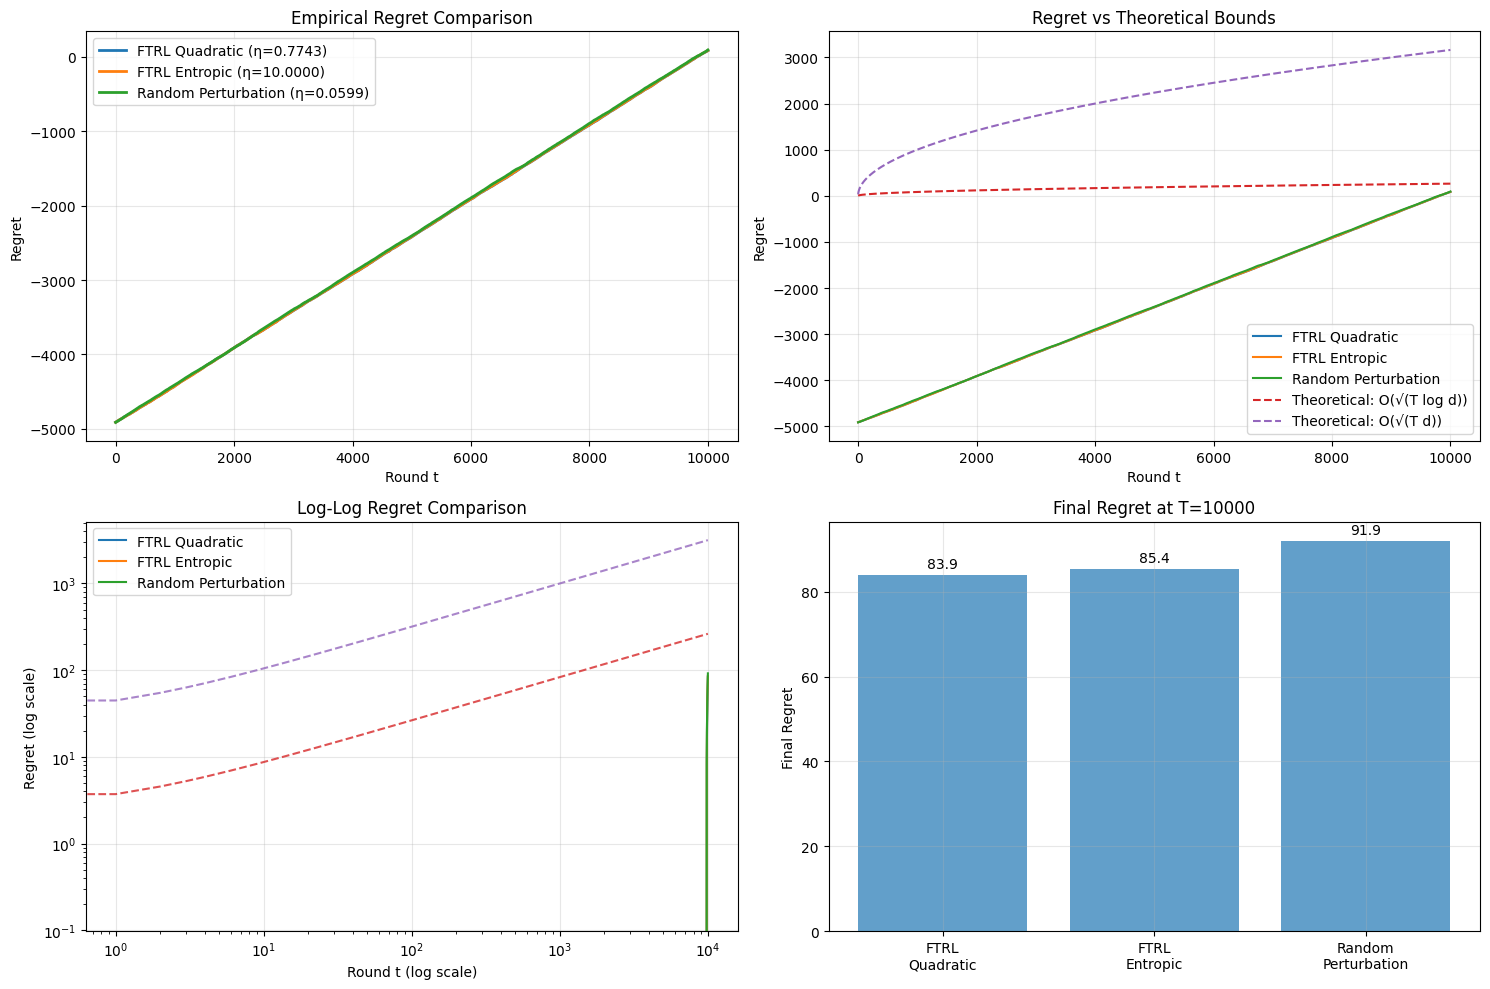


=== RESULTS SUMMARY ===
Best fixed strategy total loss: 4912.389

Final Regrets:
  FTRL Quadratic:        83.91
  FTRL Entropic:         85.43
  Random Perturbation:    91.93

Empirical Growth Rates:
  FTRL Quadratic:     O(T^nan)
  FTRL Entropic:      O(T^nan)
  Random Perturbation: O(T^nan)


C:\Users\aymuo\AppData\Local\Temp\ipykernel_19148\1128537309.py:273: RuntimeWarning: invalid value encountered in log
  return np.log(regret[-1] / regret[t_mid]) / np.log(T / t_mid)


In [ ]:
# deepseek 

import numpy as np
import matplotlib.pyplot as plt

# ------- simplex projection

def simplex_projection(y):
    """Robust projection onto the probability simplex."""
    n = len(y)
    
    if n == 0:
        return np.array([])
    
    # Sort in descending order
    u = np.sort(y)[::-1]
    
    # Calculate cumulative sums
    cssv = np.cumsum(u)
    
    # Find rho using Michelot's condition
    indices = np.arange(1, n + 1)
    condition = u > (cssv - 1) / indices
    
    # Find the largest index where condition is True
    rho_indices = np.where(condition)[0]
    if len(rho_indices) == 0:
        rho = 0
    else:
        rho = rho_indices[-1]
    
    # Calculate theta
    theta = (cssv[rho] - 1) / (rho + 1)
    
    # Project
    return np.maximum(y - theta, 0)

# Generate dataset
T, d = data.shape
np.random.seed(42)
Z = data

print("Dataset shape:", Z.shape)
print("Data range: [{:.3f}, {:.3f}]".format(Z.min(), Z.max()))

# Find the best fixed strategy
total_loss_per_arm = Z.sum(axis=0)
best_arm = np.argmin(total_loss_per_arm)
best_fixed_strategy = np.zeros(d)
best_fixed_strategy[best_arm] = 1.0
best_total_loss = total_loss_per_arm[best_arm]

print(f"Best fixed strategy: arm {best_arm} with total loss {best_total_loss:.3f}")


# Algorithm 1: FTRL with quadratic regularizer

def ftrl_quadratic(Z, eta=None):
    """FTRL with quadratic regularizer R(p) = (1/2)||p||^2"""
    T, d = Z.shape
    if eta is None:
        eta = np.sqrt(2 * np.log(d) / T)
    
    losses = []
    predictions = []
    p = np.ones(d) / d
    cum_grad = np.zeros(d)
    
    for t in range(T):
        zt = Z[t]
        loss = np.dot(p, zt)
        losses.append(loss)
        predictions.append(p.copy())
        
        cum_grad += zt
        y = -eta * cum_grad
        p = simplex_projection(y)
    
    return np.array(losses), np.array(predictions), eta

# Algorithm 2: FTRL with entropic regularizer

def ftrl_entropic(Z, eta=None):
    
    T, d = Z.shape
    if eta is None:
        eta = np.sqrt(np.log(d) / T)
    
    losses = []
    predictions = []
    p = np.ones(d) / d
    
    for t in range(T):
        zt = Z[t]
        loss = np.dot(p, zt)
        losses.append(loss)
        predictions.append(p.copy())
        
        # Multiplicative weights update
        log_weights = np.log(p) - eta * zt
        log_weights = log_weights - np.max(log_weights)  # Numerical stability
        p = np.exp(log_weights)
        p = p / np.sum(p)
    
    return np.array(losses), np.array(predictions), eta


# Algorithm 3: Random Perturbation Algorithm (FIXED)

def random_perturbation_algorithm(Z, eta=None):
    """
    Algorithm with random perturbation vector R ~ Uniform[0, 1/eta]^d
    """
    T, d = Z.shape
    if eta is None:
        eta = np.sqrt(T / d)
    
    losses = []
    predictions = []
    
    # Sample fixed random vector R
    R = np.random.uniform(0, 1/eta, d)
    
    p = np.ones(d) / d
    cum_perturbed_grad = np.zeros(d)
    
    for t in range(T):
        zt = Z[t]
        loss = np.dot(p, zt)
        losses.append(loss)
        predictions.append(p.copy())
        
        cum_perturbed_grad += (zt + R)
        best_arm = np.argmin(cum_perturbed_grad)
        p = np.zeros(d)
        p[best_arm] = 1.0
    
    return np.array(losses), np.array(predictions), eta, R


# Parameter optimization function

def optimize_eta(algo_func, Z, eta_range=np.logspace(-4, 1, 10)):
    """Find the best eta parameter for an algorithm."""
    best_eta = None
    best_regret = float('inf')
    
    for eta in eta_range:
        # Handle different return signatures
        result = algo_func(Z, eta)
        
        # Extract losses based on return type
        if len(result) == 3:
            losses, _, _ = result
        else:  # random_perturbation_algorithm returns 4 values
            losses, _, _, _ = result
        
        regret = np.sum(losses) - best_total_loss
        
        if regret < best_regret:
            best_regret = regret
            best_eta = eta
            
    return best_eta

# Run all algorithms with optimized parameters

print("Optimizing parameters...")

# For algorithms that return 3 values
eta_quad_opt = optimize_eta(ftrl_quadratic, Z)
eta_ent_opt = optimize_eta(ftrl_entropic, Z)

# For random_perturbation_algorithm that returns 4 values
eta_rpa_opt = optimize_eta(random_perturbation_algorithm, Z)

print(f"Optimized parameters:")
print(f"  Quadratic FTRL: η = {eta_quad_opt:.6f}")
print(f"  Entropic FTRL: η = {eta_ent_opt:.6f}")
print(f"  Random Perturbation: η = {eta_rpa_opt:.6f}")

# Run with optimized parameters
losses_quad, preds_quad, _ = ftrl_quadratic(Z, eta_quad_opt)
losses_ent, preds_ent, _ = ftrl_entropic(Z, eta_ent_opt)
losses_rpa, preds_rpa, _, R_opt = random_perturbation_algorithm(Z, eta_rpa_opt)

# Calculate regrets
regret_quad = np.cumsum(losses_quad) - best_total_loss
regret_ent = np.cumsum(losses_ent) - best_total_loss
regret_rpa = np.cumsum(losses_rpa) - best_total_loss


# Plotting

plt.figure(figsize=(15, 10))

# Main regret comparison
plt.subplot(2, 2, 1)
plt.plot(regret_quad, label=f"FTRL Quadratic (η={eta_quad_opt:.4f})", linewidth=2)
plt.plot(regret_ent, label=f"FTRL Entropic (η={eta_ent_opt:.4f})", linewidth=2)
plt.plot(regret_rpa, label=f"Random Perturbation (η={eta_rpa_opt:.4f})", linewidth=2)
plt.xlabel("Round t")
plt.ylabel("Regret")
plt.title("Empirical Regret Comparison")
plt.legend()
plt.grid(True, alpha=0.3)

# Theoretical bounds
plt.subplot(2, 2, 2)
t_range = np.arange(1, T+1)
plt.plot(regret_quad, label="FTRL Quadratic")
plt.plot(regret_ent, label="FTRL Entropic")
plt.plot(regret_rpa, label="Random Perturbation")
plt.plot(np.sqrt(t_range * np.log(d)), '--', label="Theoretical: O(√(T log d))")
plt.plot(np.sqrt(t_range * d), '--', label="Theoretical: O(√(T d))")
plt.xlabel("Round t")
plt.ylabel("Regret")
plt.title("Regret vs Theoretical Bounds")
plt.legend()
plt.grid(True, alpha=0.3)

# Log-scale plot
plt.subplot(2, 2, 3)
plt.loglog(regret_quad, label="FTRL Quadratic")
plt.loglog(regret_ent, label="FTRL Entropic")
plt.loglog(regret_rpa, label="Random Perturbation")
plt.loglog(np.sqrt(t_range * np.log(d)), '--', alpha=0.8)
plt.loglog(np.sqrt(t_range * d), '--', alpha=0.8)
plt.xlabel("Round t (log scale)")
plt.ylabel("Regret (log scale)")
plt.title("Log-Log Regret Comparison")
plt.legend()
plt.grid(True, alpha=0.3)

# Final regret comparison
plt.subplot(2, 2, 4)
final_regrets = [regret_quad[-1], regret_ent[-1], regret_rpa[-1]]
alg_names = ['FTRL\nQuadratic', 'FTRL\nEntropic', 'Random\nPerturbation']
bars = plt.bar(alg_names, final_regrets, alpha=0.7)
plt.ylabel("Final Regret")
plt.title(f"Final Regret at T={T}")
plt.grid(True, alpha=0.3)

# Add value labels
for bar, val in zip(bars, final_regrets):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(final_regrets)*0.01,
             f'{val:.1f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()


# Summary statistics

print(f"\n=== RESULTS SUMMARY ===")
print(f"Best fixed strategy total loss: {best_total_loss:.3f}")
print(f"\nFinal Regrets:")
print(f"  FTRL Quadratic:     {regret_quad[-1]:8.2f}")
print(f"  FTRL Entropic:      {regret_ent[-1]:8.2f}")
print(f"  Random Perturbation: {regret_rpa[-1]:8.2f}")

# Estimate growth rates
def estimate_growth_rate(regret):
    """Estimate the growth rate of regret."""
    t_mid = len(regret) // 2
    if t_mid == 0 or regret[t_mid] == 0:
        return 0.5  # Default to sqrt growth
    return np.log(regret[-1] / regret[t_mid]) / np.log(T / t_mid)

print(f"\nEmpirical Growth Rates:")
print(f"  FTRL Quadratic:     O(T^{estimate_growth_rate(regret_quad):.3f})")
print(f"  FTRL Entropic:      O(T^{estimate_growth_rate(regret_ent):.3f})")
print(f"  Random Perturbation: O(T^{estimate_growth_rate(regret_rpa):.3f})")

In [25]:
# Adversary sequence: repeat the row T times
Z = np.tile(row, (T,1))   # shape (T, d)


# regret computation 
def compute_regret(losses):
    # losses: list of per-round loss (scalar)
    cumulative_loss = np.cumsum(losses)
    # best fixed expert loss in hindsight
    best_loss = np.min(np.cumsum(Z, axis=0), axis=1)
    return cumulative_loss - best_loss

In [32]:
def simplex_projection(y):
    """Project vector y onto the probability simplex Δ_d."""
    d = len(y)
    u = np.sort(y)[::-1]
    cssv = np.cumsum(u)
    rho = np.nonzero(u * np.arange(1, d + 1) > (cssv - 1))[0][-1]
    theta = (cssv[rho] - 1) / (rho + 1.0)
    return np.maximum(y - theta, 0)

# ============================
# 1. FTRL with Quadratic Reg.
# ============================
eta = 0.1
p = np.ones(d) / d
cum_grad = np.zeros(d)
losses_quad = []

for t in range(T):
    zt = np.array(Z[t, :]).reshape(-1)
    losses_quad.append(np.dot(p, zt))

    cum_grad += zt
    y = -eta * cum_grad
    p = simplex_projection(y)


# ============================
# 2. FTRL with Entropic Reg.
# ============================
eta = 0.1
p = np.ones(d) / d
cum_grad = np.zeros(d)
losses_entropy = []

for t in range(T):
    zt = np.array(Z[t, :]).reshape(-1)
    losses_entropy.append(np.dot(p, zt))

    cum_grad += zt
    w = np.exp(-eta * cum_grad)
    p = w / np.sum(w)


# ============================
# 3. FPL (Follow Perturbed Leader)
# ============================
eta = 0.1
p = np.ones(d) / d
cum_grad = np.zeros(d)
losses_fpl = []

for t in range(T):
    zt = np.array(Z[t, :]).reshape(-1)
    losses_fpl.append(np.dot(p, zt))

    cum_grad += zt
    noise = np.random.exponential(scale=1/eta, size=d)
    y = -cum_grad + noise
    e = np.zeros(d)
    e[np.argmin(y)] = 1.0
    p = e


# ============================
# 4. Compute Regret
# ============================
cum_loss_quad = np.cumsum(losses_quad)
cum_loss_entropy = np.cumsum(losses_entropy)
cum_loss_fpl = np.cumsum(losses_fpl)

# Best fixed action in hindsight
best_fixed_loss = np.min(Z.sum(axis=0))
best_fixed_losses = np.arange(1, T+1) * best_fixed_loss / T

regret_quad = cum_loss_quad - best_fixed_losses
regret_entropy = cum_loss_entropy - best_fixed_losses
regret_fpl = cum_loss_fpl - best_fixed_losses


ValueError: shapes (1000,) and (1,) not aligned: 1000 (dim 0) != 1 (dim 0)

In [28]:
# =======================
# 6. Plot results
# =======================
plt.figure(figsize=(8,5))
plt.plot(regret_quad, label="FTRL (quadratic)")
plt.plot(regret_ent, label="FTRL (entropic/EG)")
plt.plot(regret_fpl, label="FPL (uniform perturb.)")
plt.xlabel("Rounds")
plt.ylabel("Regret")
plt.title("Regret vs Time (d={}, T={})".format(d, T))
plt.legend()
plt.grid(True)
plt.show()

NameError: name 'regret_quad' is not defined

<Figure size 800x500 with 0 Axes>

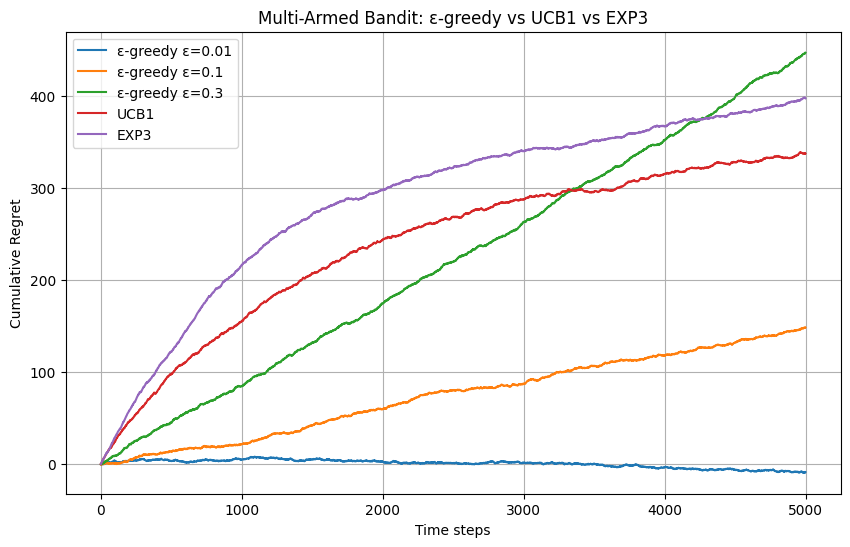

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# ---------- Environment ----------
class BetaBandit:
    def __init__(self, alphas, betas):
        self.alphas = alphas
        self.betas = betas
        self.n_arms = len(alphas)
        self.means = [a / (a + b) for a, b in zip(alphas, betas)]  # true expected rewards

    def pull(self, arm):
        return np.random.beta(self.alphas[arm], self.betas[arm])

# ---------- Algorithms ---------- 

class EpsilonGreedy:
    def __init__(self, n_arms, epsilon):
        self.epsilon = epsilon
        self.n_arms = n_arms
        self.counts = np.zeros(n_arms)
        self.values = np.zeros(n_arms)

    def select_arm(self):
        if np.random.rand() < self.epsilon:
            return np.random.randint(self.n_arms)
        return np.argmax(self.values)

    def update(self, arm, reward):
        self.counts[arm] += 1
        n = self.counts[arm]
        self.values[arm] += (reward - self.values[arm]) / n


class UCB1:
    def __init__(self, n_arms):
        self.n_arms = n_arms
        self.counts = np.zeros(n_arms)
        self.values = np.zeros(n_arms)
        self.total_count = 0

    def select_arm(self):
        self.total_count += 1
        if 0 in self.counts:
            return np.argmin(self.counts)
        ucb_values = self.values + np.sqrt(2 * np.log(self.total_count) / self.counts)
        return np.argmax(ucb_values)

    def update(self, arm, reward):
        self.counts[arm] += 1
        n = self.counts[arm]
        self.values[arm] += (reward - self.values[arm]) / n


class EXP3:
    def __init__(self, n_arms, gamma=0.07):
        self.n_arms = n_arms
        self.gamma = gamma
        self.weights = np.ones(n_arms)

    def select_arm(self):
        probs = (1 - self.gamma) * (self.weights / np.sum(self.weights)) + self.gamma / self.n_arms
        return np.random.choice(self.n_arms, p=probs), probs

    def update(self, arm, reward, probs):
        x_hat = reward / probs[arm]
        self.weights[arm] *= np.exp(self.gamma * x_hat / self.n_arms)

# ---------- Simulation ---------- #
def run_simulation(bandit, algo, horizon=5000):
    rewards, regrets = [], []
    best_mean = max(bandit.means)
    for t in range(horizon):
        if isinstance(algo, EXP3):
            arm, probs = algo.select_arm()
            reward = bandit.pull(arm)
            algo.update(arm, reward, probs)
        else:
            arm = algo.select_arm()
            reward = bandit.pull(arm)
            algo.update(arm, reward)

        rewards.append(reward)
        regret = best_mean - reward
        regrets.append(regret if t == 0 else regrets[-1] + regret)
    return np.array(regrets)

# ---------- Main ---------- 
np.random.seed(42)

# Define bandit instance with 10 arms
alphas = [5] * 10
betas = [5 * i for i in range(1, 11)]
bandit = BetaBandit(alphas, betas)

horizon = 5000

# Test three epsilons
epsilons = [0.01, 0.1, 0.3]
results = {}

for eps in epsilons:
    algo = EpsilonGreedy(bandit.n_arms, epsilon=eps)
    regrets = run_simulation(bandit, algo, horizon)
    results[f"ε-greedy ε={eps}"] = regrets

# UCB
ucb_algo = UCB1(bandit.n_arms)
results["UCB1"] = run_simulation(bandit, ucb_algo, horizon)

# EXP3
exp3_algo = EXP3(bandit.n_arms, gamma=0.07)
results["EXP3"] = run_simulation(bandit, exp3_algo, horizon)

# ---------- Plot ---------- 
plt.figure(figsize=(10,6))
for label, regrets in results.items():
    plt.plot(regrets, label=label)
plt.xlabel("Time steps")
plt.ylabel("Cumulative Regret")
plt.title("Multi-Armed Bandit: ε-greedy vs UCB1 vs EXP3")
plt.legend()
plt.grid(True)
plt.show()
